### APE on average InfoNCE loss across all combinations

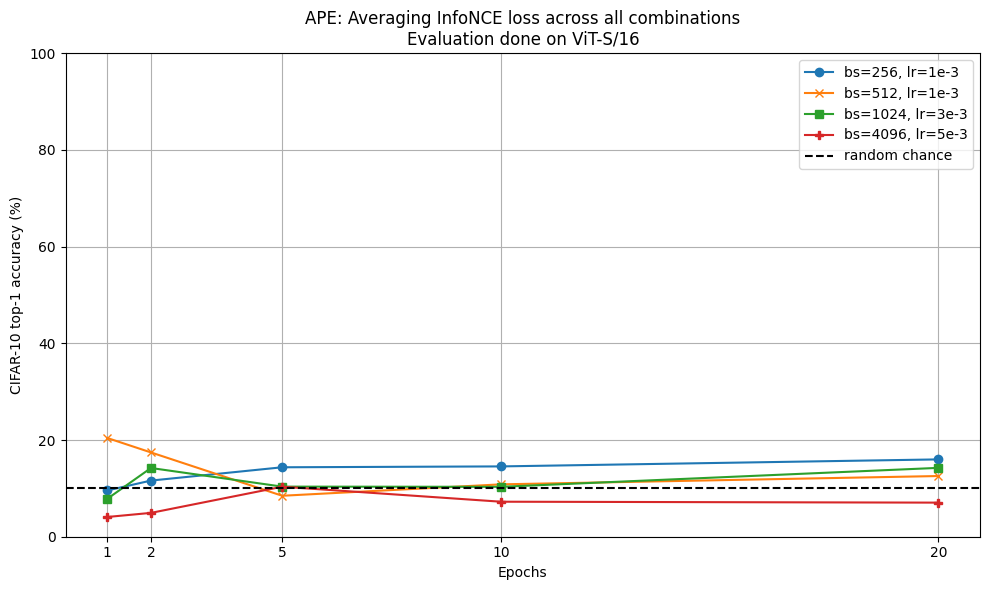

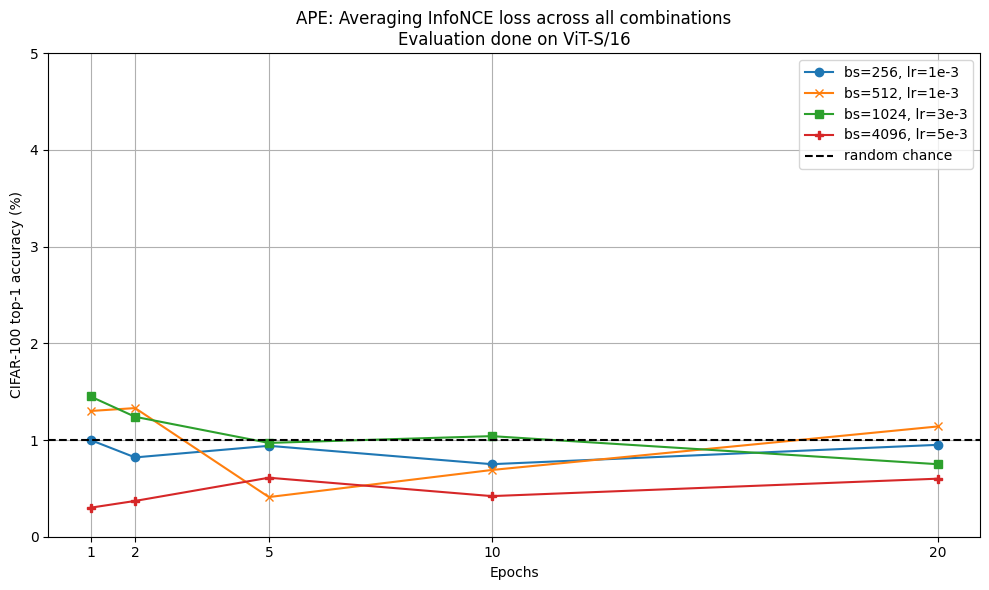

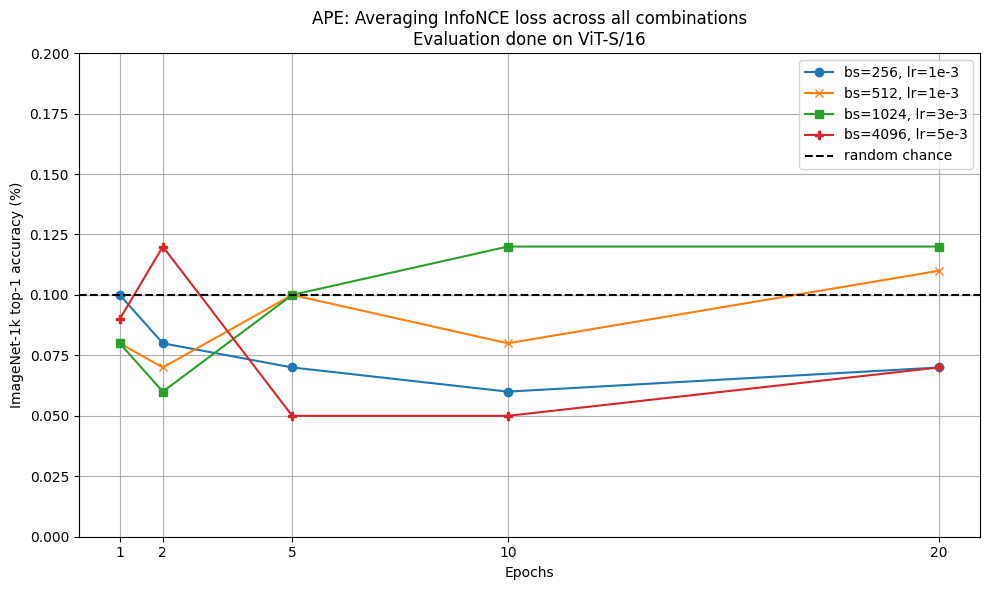

In [5]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    # acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    # plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'APE: Averaging InfoNCE loss across all combinations\nEvaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()